In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
#measurement class
measurement = Base.classes.measurement

#station class
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
#print
print(most_recent)

('2017-08-23',)


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_date = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(year_date)


2016-08-23 00:00:00


In [12]:
# Perform a query to retrieve the data and precipitation scores
sel = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_date).\
    group_by(measurement.date).all()
sel


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [13]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names

percip_df = pd.DataFrame(sel, columns=["Date", "Percip"])

# Sort the dataframe by date

percip_df.set_index("Date")
percip_df



,Date,Percip
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
360,2017-08-19,0.00
361,2017-08-20,0.00
362,2017-08-21,0.00
363,2017-08-22,0.00


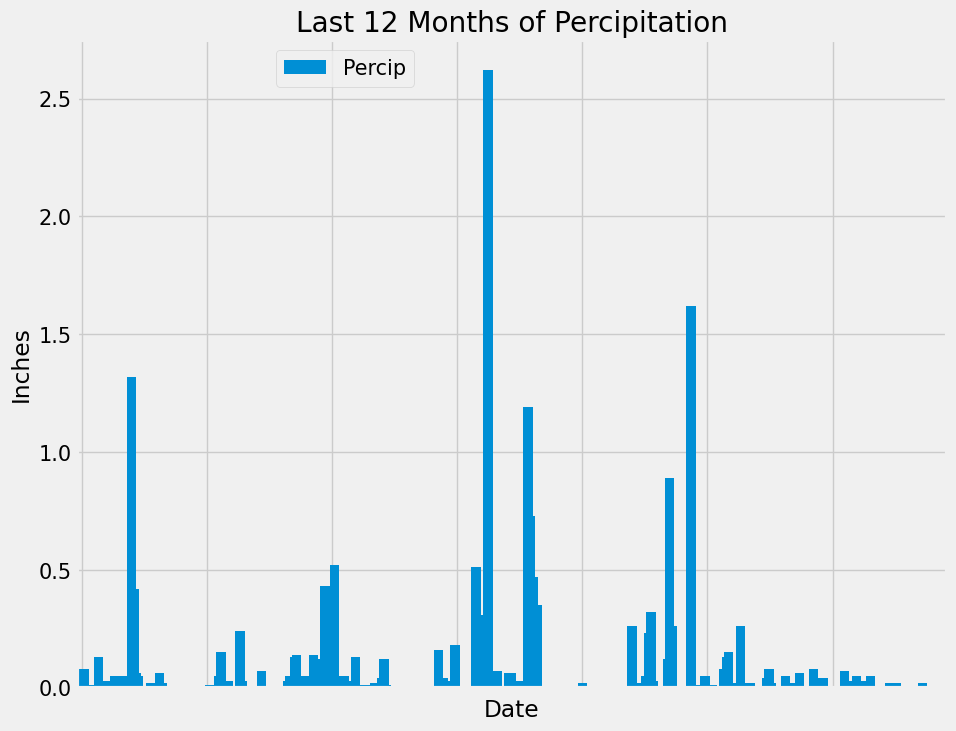

In [27]:

# Use Pandas Plotting with Matplotlib to plot the data

percip_analysis_plot = percip_df.plot(kind="bar", width = 4, figsize=(10,8))
percip_analysis_plot.grid(True)
plt.locator_params(axis="x", nbins = 7)
percip_analysis_plot.xaxis.set_major_formatter(plt.NullFormatter())
percip_analysis_plot.tick_params(axis="y", labelsize=15)
plt.legend(bbox_to_anchor=(.4, 1), fontsize = "15")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Last 12 Months of Percipitation")
plt.show
plt.savefig("../SurfsUp/Last12Percip.png")

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
percip_df.describe()

,Percip
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()


9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_data = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_data[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
    filter(measurement.station == most_active).all()


[(54.0, 71.66378066378067, 85.0)]

In [20]:
most_active = station_data[0][0]
most_active



'USC00519281'

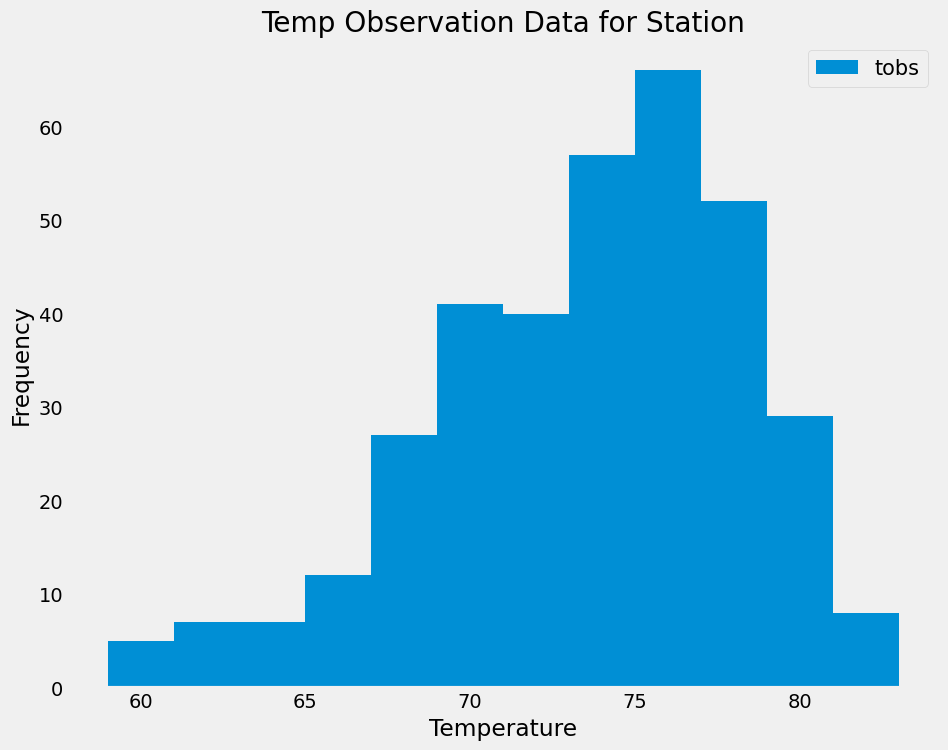

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == most_active).\
    filter(measurement.date >= year_date).all()

station_df = pd.DataFrame(station_results)
station_df.set_index("station")
station_df

station_df.plot.hist(by = "station", bins = 12, figsize=(10,8))
plt.title("Temp Observation Data for Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor = (1,1), fontsize = 15)
plt.grid()
plt.show
plt.savefig("../SurfsUp/StationTemperatures.png")


# Close Session

In [24]:
# Close Session
session.close()